<a href="https://colab.research.google.com/github/TravelingEngineer/Sandbox/blob/master/RT_ModeL_Rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorboard Config

**Unpack Ngrok**

In [73]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-03-25 02:30:16--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.204.22.7, 34.226.180.131, 52.72.145.109, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.204.22.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13584026 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  12.95M  6.41MB/s    in 2.0s    

2019-03-25 02:30:19 (6.41 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13584026/13584026]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


**Start Tensorboard**

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

**Start Ngrok**

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

**Retrieve URL for Tensorboard**

In [76]:
#click on link generated to open Tensorboard
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://6b4423d8.ngrok.io


In [0]:
#tensorflow specific libraries
import tensorflow as tf
from tensorflow.python.data import Dataset
import keras
from keras        import metrics
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.callbacks import TensorBoard

#tf.enable_eager_execution() #tf.placeholder not compatible with eager execution, used for autoencoder

tf.logging.set_verbosity(tf.logging.ERROR) #sets threshold for what is logged in tenserflow

**Clear Tensorboard Records Directory**

In [0]:
!rm -rf log

# Colaboratory Config

**Import Libraries and Methods**

In [0]:
from __future__ import division #import python 3 updates for floating point division
from __future__ import print_function

import os
import math

from IPython.display import Audio
from scipy.io import wavfile
from scipy import signal
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

import datetime
import numpy as np
from numpy import mean, sqrt, square, arange
import random
import numpy.random 
from sklearn import metrics

**Google Drive Configuration **

In [42]:
from google.colab import auth
from google.colab import files
#email Collins.AE6@gmail.com
#pswd machine_learning610
from google.colab import drive
drive.mount('/content/drive')

#Upload data from GoogleDrive
gDrive= '/content/drive/My Drive/Training_Database/gaussian_database/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Audio File Processing

In [65]:
#check for data
!ls "/content/drive/My Drive/Training_Database/gaussian_database/"

 prediction_database_convolved_speech.npy
 prediction_database_gaussian_impulse.npy
 prediction_database_rt_random.npy
 training_database_convolved_speech.npy
 training_database_gaussian_impulse.npy
 training_database_rt_random.npy
'validation_database_convolved_speech (1).npy'
 validation_database_gaussian_impulse.npy
 validation_database_rt_random.npy


**Load databases**

In [0]:
#load convolved speech databases
training = gDrive+'training_database_convolved_speech.npy'
training_database_convolved_speech = np.load(training)

validation = gDrive+'validation_database_convolved_speech (1).npy'
validation_database_convolved_speech = np.load(validation)

prediction = gDrive+'prediction_database_convolved_speech.npy'
prediction_database_convolved_speech = np.load(prediction)

In [0]:
#load reverberation time database
training_rt = gDrive+'training_database_rt_random.npy'
training_database_rt_random = np.load(training_rt)

validation_rt = gDrive+'validation_database_rt_random.npy'
validation_database_rt_random = np.load(validation_rt)

prediction_rt = gDrive+'prediction_database_rt_random.npy'
prediction_database_rt_random = np.load(prediction_rt)

In [84]:
fs = 16000
Audio(prediction_database_convolved_speech[25], rate=fs)

# Take Signal Envelope

**Apply Hilbert Transform**

In [0]:
#original audio file
#fig = plt.figure()
#axes1 = fig.add_subplot(111) #set props for left y-axis here

#axes1.set_ylabel('original convolved file')
#axes2 = axes1.twinx() #mirror axis
#axes2.set_ylabel('phase angle')

#plot original file
#plt.plot(speech_convolved, label = 'original file', color = 'black', alpha = 1)

##############analytical_impulse = signal.hilbert(speech_convolved_even, axis=1)
#plt.plot(analytical_impulse.real, label = 'analytic real part', color = 'red', alpha = 0.5)
#plt.plot(analytical_impulse.imag, label = 'analytic imaginary part', color = 'blue', alpha = 0.5)

##############envelope_analytical_impulse = np.abs(analytical_impulse)
##############plt.plot(envelope_analytical_impulse[0], label = 'analytic envelope', color = 'red', alpha = 0.5)

#phase_radians =np.angle(analytical_impulse)
#phase_angle = np.cos(phase_radians)
#plt.plot(phase_angle, label = 'phase angle', color = 'blue', alpha = 0.5)

#display settings
#plt.ylabel('Impulse Response')
##############plt.xlabel('Time [samples]')
##############plt.legend()

#calculates segement of file to display
#time = 2 #in seconds
#points_to_plot = fs*time
#plt.xlim(0.014*fs,0.025*fs) #(0.014*fs,0.025*fs)
#plt.ylim(-0.1,0.1)

##############plt.show()

# Dimensionality Reduction

**Output Files**

**Autoencoder Config**

In [0]:
#264599/1024

In [0]:
# size of encoded representations
#encoding_dim = 1024 #1024 floats -> compression factor 258.4, w/ input 264599 float convolved audio file

# input placeholder
#input_initalization = Input(shape=(264599,))
# "encoded" is representation of input
#encoded = Dense(encoding_dim, activation='relu')(input_initalization)

#dense layer with regularizer (sparsity constraint)
#encoded = Dense(encoding_dim, activation='relu',
               #activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is lossy reconstruction of input
#decoded = Dense(264599, activation='sigmoid')(encoded)

#this model maps an input to reconstruction represenation
#autoencoder = Model(input_initalization,decoded)
#this model maps an input to encoded represenation
#encoder = Model(input_initalization,encoded)
#create a placeholder for encoded (1024-dimensional) input
#encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-1]
#create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))

**Optimizer Configuration**

In [0]:
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') #optimizer options adam, adadelta

**Partition dataset into training and test sets**

In [0]:
# first 15 files (out of 20) for training
#training_examples = speech_convolved[0:9,:] #grabs first part of data
#training_targets = speech_convolved[10:15,:] #grabs end part of data

Autoencoder training

In [0]:
#training for 5 epochs
#autoencoder.fit(training_examples, training_examples,
               #epochs=5,
               #batch_size=256,
               #shuffle=True,
               #validation_data=(training_targets, training_targets))

# Convolution Neural Network

**Format Datasets For Convolution**

In [47]:
training_database_convolved_speech.shape

(500, 64000)

In [0]:

number_of_features = 1 #feature number for CNN input, since univariant time series only 1 feature
cnn_sequence_length = 4*16000 #timesteps for CNN nextwork per sample, map over each entire sample

input_database = training_database_convolved_speech
input_database = input_database[:,:,np.newaxis]
output_database = training_database_rt_random

validation_input = validation_database_convolved_speech
validation_input = validation_input[:,:,np.newaxis]

validation_output = validation_database_rt_random

prediction_input = prediction_database_convolved_speech
prediction_input = prediction_input[:,:,np.newaxis]

In [60]:
input_database.shape

(500, 64000, 1)

# Neural Network Configuration

**Declare Model Type**

In [0]:
model = Sequential() #stacked layers of neural network

**Convolution Layer #1**

In [0]:
#adds a 1D convolutional layer, 1 dimension (temporal) on raw audio
#config is 32 output chanels, 
#kernal size is 5x5 moving window, 
#strides in x and y directions (1,1)
#rectilinear activation function, provide size of input to the layer, size only required for first 
#layer after that keras can calculate size of tensors
#in keras don't need to declare weights or biases variables, done for you with program

model.add(Conv1D(256, 
                 kernel_size=400,        #setup window size to be equal to strides for no overlap    
                 strides= 400,            #25ms stride window with 16kHz sampling rate gives a window ever 400 points for a total of 240 windows.     
                 activation='relu',           #rectilinear activation function
                 input_shape=(cnn_sequence_length,number_of_features))) #training_data.shape[0]) input_shape = (img_x, img_y, 1)

**Pooling Layer #1**

In [0]:
model.add(MaxPooling1D(pool_size=(64), strides=(1))) #setup pooling layer, size of pooling in x, y dimensions and strides in x,y

**Convolution Layer #2**

In [0]:
model.add(Conv1D(32, 
                 kernel_size=(1),        #setup window size to be equal to strides for no overlap    
                 strides=(1),            #25ms stride window with 16kHz sampling rate gives a window ever 400 points for a total of 240 windows.     
                 activation='relu'))          #rectilinear activation function
                                              #shape is tracked in Keras after initializing so no need to specify input shape again.

**Pooling Layer #2**

In [0]:
model.add(MaxPooling1D(pool_size=(16), strides=(1))) #setup pooling layer, size of pooling in x, y dimensions and strides in x,y

**Flatten Pooling Layers & Connect To Fully Connected Layer**

In [0]:
model.add(Flatten())

**Output Layer**

In [0]:
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='linear')) #gives one linear output layer for regression, if classification typically Dense(num_classes, activation='softmax'))

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 160, 256)          102656    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 97, 256)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 97, 32)            8224      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 82, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2624)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2625000   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1001      
Total para

# Training Neural Network

**Compile Network**

In [0]:
model.compile(loss=keras.losses.mean_squared_error, #defines loss function and optimizer, standard cross entropy for categorical class classification #categorical_crossentropy
              optimizer=keras.optimizers.Adam(),
              metrics=['mse'])                       #specifies a metric that will be calculated during operation, ['accuracy'] useful for classification but not regression 

**Hyperparameters**

In [0]:
batch_size = 150
epochs = 10 #of iterations

**Tensorboard Parameter Config**

In [0]:
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size)

**Fit Model & Training Parameters**

In [91]:
model.fit(x=input_database,                        #pass in all training data, next define batch, training epochs, verbose defines what info is printed, x = input, y = output you are training model to output
          y=output_database,
          batch_size=batch_size,                   #pass validation or test data to the fit function so Keras knows what data to test metric against when evaluate is run on model
          epochs=epochs, 
          verbose=1,                               #show realtime processing, =0 for no updates, =1 for progress bar =2 one line per epoch
          #validation_split=0.5,                    #fraction of input_database used for training vs validation
          validation_data = (validation_input, validation_output),
          callbacks=[tbCallBack])

Train on 500 samples, validate on 50 samples
Epoch 1/10
500/500 [==============================] - 0s 790us/step - loss: 8.3840e-04 - mean_squared_error: 8.3840e-04 - val_loss: 0.1288 - val_mean_squared_error: 0.1288
Epoch 2/10
500/500 [==============================] - 0s 758us/step - loss: 7.6984e-04 - mean_squared_error: 7.6984e-04 - val_loss: 0.1298 - val_mean_squared_error: 0.1298
Epoch 3/10
500/500 [==============================] - 0s 759us/step - loss: 6.6155e-04 - mean_squared_error: 6.6155e-04 - val_loss: 0.1291 - val_mean_squared_error: 0.1291
Epoch 4/10
500/500 [==============================] - 0s 773us/step - loss: 5.8145e-04 - mean_squared_error: 5.8145e-04 - val_loss: 0.1290 - val_mean_squared_error: 0.1290
Epoch 5/10
500/500 [==============================] - 0s 785us/step - loss: 4.9115e-04 - mean_squared_error: 4.9115e-04 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 6/10
500/500 [==============================] - 0s 795us/step - loss: 4.2650e-04 - mean_s

In [0]:
#score = model.evaluate(output_database, , verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
#plt.plot(range(1, 11), history.acc)
#lt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.show()

**RT predictions with trained CNN**

In [0]:
rt_predictions = model.predict(prediction_input, verbose=1)
rt_predictions = np.around(rt_predictions,1)
print(rt_predictions)

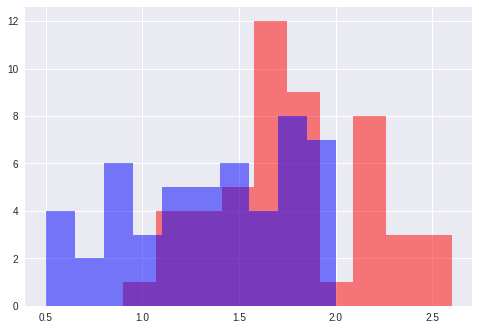

In [93]:
plt.hist(rt_predictions, label = 'RT_Predictions', color = 'red', alpha = 0.5)
plt.hist(prediction_database_rt_random, label = 'RT_answers', color = 'blue', alpha = 0.5)
plt.show()